## 第13章 神经网络
前面我们介绍了机器学习中几种常用算法，如线性模型、SVM、集成学习等有监督学习，这些算法我们都可以用神经网络来实现，神经网络的万能近似定理(universal approximation theorem)为重要理论依据。在功能上能够实现传统机器学习算法，而且效率、便捷方面也往往好于传统机器学习，尤其涉及大数据、非结构化数据，如图像、语音等，更能体现神经网络的优势。因此，近些年神经网络发展非常快、应用也非常广。

### 13.2 单层神经网络
一个神经元模型包含输入、计算、输出等功能。下图是一个典型的神经元模型：包含有3个输入、1个输出、计算功能（先求和，然后把求和结果传递给激活函数）。
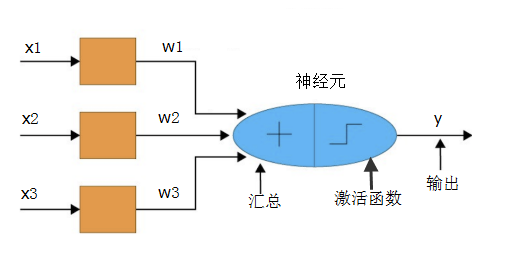

（1）Sigmoid函数

In [1]:
import numpy as np

In [2]:
#导入numpy
import numpy as np
#定义sigmoid函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

（2）Relu函数

In [3]:
def relu(x):
    return np.maximum(0,x)

（3）Tanh函数

In [4]:
def tanh(x):
    exp2x=np.exp(-2*x)
    return (1-exp2x)/(1+exp2x)

（4）Softmax 函数

In [5]:
#为防止计算np.exp(x)出现溢出问题，一般采用如下方法定义softmax函数
def softmax(x):
    max_x=np.max(x)  #得到向量x的最大值
    x=x-max_x        #每项减去最大值
    sum_expx=np.sum(np.exp(x))
    return np.exp(x)/sum_expx

### 13.3 多层神经网络
#### 13.3.1 多层神经网络架构简介
下图为一个简单的三层神经网络。
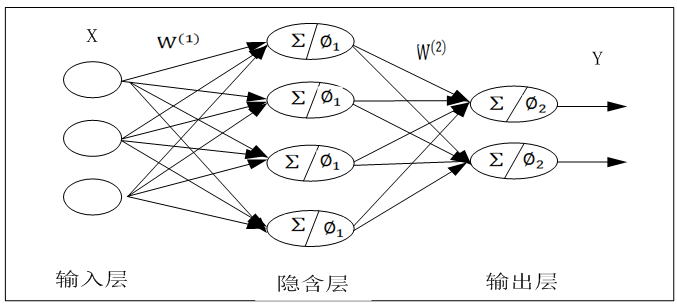

### 13.4 输出层

#### 13.4.3多分类

In [6]:
y=np.array([2,3,8,5])
#y通过激活函数softmax，得到z
z=softmax(y)
#查看z属于哪类
np.argmax(z)  #2


2

### 13.5 损失函数
机器学习都是基于损失函数来学习的，在使损失函数最小化的过程中，不断更新参数，参数更新后，代入损失函数，以此，不断迭代，最终得到使损失值最小的权重。
	损失函数可以是任何函数，不过一般使用均方误差和交叉熵


#### 13.5.1 均方误差

（1）定义标签及输出值

In [7]:
t=[0,0,0,1,0,0,0,0,0,0]
y=[0.1,0.01,0.2,0.5,0.1,0.05,0.04,0.0,0.0,0.0]

（2）定义均方误差损失函数

In [8]:
#定义均方差函数
def mse_loss(y,t):
    return 0.5*np.sum((y-t)**2)

（3）为便于使用广播机制，需要把序列转换为numpy数组，计算均方误差。

In [9]:
#把y，t序列转换为numpy数组
y1=np.array(y)
t1=np.array(t)
a=mse_loss(y1,t1)
print("均方误差：{:.4f}".format(a))

均方误差：0.1571


#### 13.5.2交叉熵误差
以下用Python求出交叉熵误差

（1）准备数据

In [10]:
t=[0,0,0,1,0,0,0,0,0,0]
y=[0.1,0.01,0.2,0.5,0.1,0.05,0.04,0.0,0.0,0.0]

（2）定义交叉熵损失函数

In [11]:
#定义交叉熵损失函数
def ce_loss(y,t):
    #为防止0对数的情况，这里添加一个非常小的常数
    d=1e-6
    return -np.sum(t*np.log(y+d))

（3）把序列转换为numpy数组，计算交叉熵误差。

In [13]:
#把y，t序列转换为numpy数组
y1=np.array(y)
t1=np.array(t)
b=ce_loss(y1,t1)
print("交叉熵误差：{:.4f}".format(b))  #交叉熵误差：0.6931

交叉熵误差：0.6931


（4）假设手写3的另一个输出值

In [14]:
#假设手写3的另一个输出值
z=[0.0,0.0,0.1,0.8,0.05,0.05,0.0,0.0,0.0,0.0]

（5）计算z交叉熵误差

In [15]:
z1=np.array(z)
c=ce_loss(z1,t1)
print("交叉熵误差：{:.4f}".format(c))  #交叉熵误差：0.2231


交叉熵误差：0.2231


### 13.6 正向传播
#### 13.6.1 定义输入层

In [16]:
import numpy as np

#定义输入数据
X=np.array([1.0,1.5,0.5])

#### 13.6.2 实现从输入层到隐含层
（1）计算隐含层到输出层的加权和
 隐含层的加权和：$$Z^{(1)}=XW^{(1)}$$ Python实现的代码如下：

In [17]:
#初始化权重,w1为3x4矩阵
W1=np.array([[0.1,0.2,0.3,0.4],[0.2,0.5,0.1,0.3],[0.3,0.4,0.2,0.1]])
#查看W1的形状
print(W1.shape)
#计算加权和，使用点积运算，具体可参考9.4.2小节
Z1=np.dot(X,W1)
#查看A1的形状
print(Z1.shape)

(3, 4)
(4,)


（2）计算隐含层加权后被激活函数转换后的值
      隐含层加权和被激活函数转换后的值为：$$A^{(1)} =sigmoid(Z^{(1)})$$，用Python实现的代码如下：


In [18]:
A1=sigmoid(Z1)
print(A1)

[0.63413559 0.75951092 0.63413559 0.7109495 ]


#### 13.6.3 实现从隐含层到输出层
（1）计算隐含层到输出层的加权和

In [19]:
#初始化加权矩阵W2,W2是一个4x2的矩阵
W2=np.array([[0.1,0.2],[0.3,0.1],[0.2,0.1],[0.5,0.1]])
#计算加权和Z2
Z2=np.dot(A1,W2)
#查看Z2的形状
print(Z2.shape)  #(2,0)
print(Z2)  #[0.7735687  0.33728672]

(2,)
[0.7735687  0.33728672]


（2）计算输出值

In [20]:
Y=softmax(Z2)
print(Y) #[0.60737275 0.39262725]

[0.60737275 0.39262725]


#### 13.6.4 根据输出层计算损失值
	假设样本X对应的标签label=[1,0],则可以算出它的交叉熵损失值。


In [21]:
t=[1,0]
#把t转换为numpy数组
t1=np.array(t)
#代入交叉熵损失函数
ce_loss(Y,t1)

0.49861095030672953

### 13.7 误差反向传播
这里的反向传播，又称为BP（Back Propagation，简称BP）算法。BP算法就是以损失函数或目标函数为基础，采用梯度下降法，通过比较实际输出和期望输出得到误差信号，把误差信号从输出层逐层传播到各层的误差信号，再通过调整各层的连接权重以减小误差，通过多次迭代，最终获取最小权重。

#### 13.7.4 混合运算的反向传播
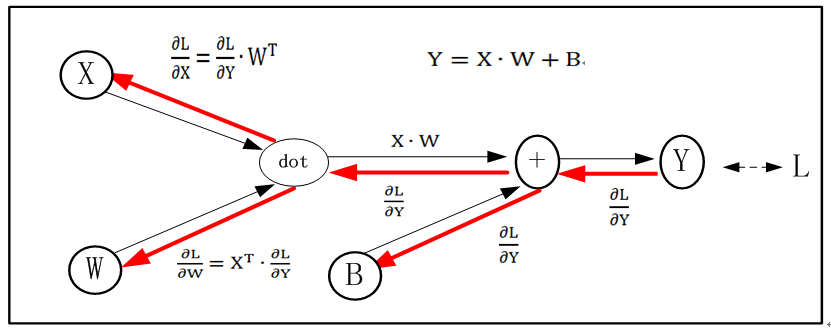

（1）正向传播

In [22]:
def forward(self,x):
        self.x=x
        y=np.dot(x,self.w)+self.b
        return y  

（2）反向传播

In [23]:
def backword(self,l):
        dx=np.dot(l,self.w.T)
        #为了使用广播机制，需要把x的形状由(3,)变为(3,1)
        dw=np.dot(np.expand_dims(self.x.T,axis=1),l)
        db=np.sum(l)
        return dw,db


#### 13.7.5 Python实现神经网络
实现下图的神经网络
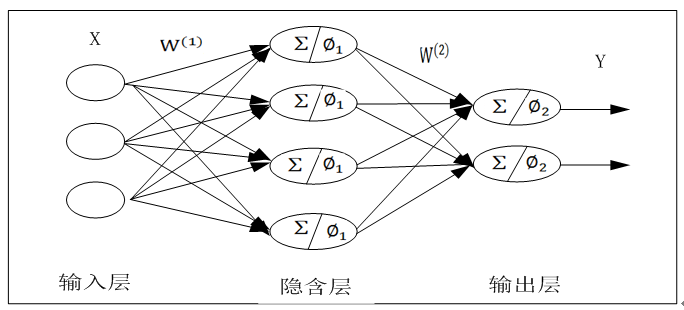
（1）定义network类

In [25]:
import numpy as np

#定义一个类，这个类里包括正向传播和反向传播
class network:
    #初始化参数
    def __init__(self,w,b):
        self.w=w
        self.b=b
        self.x=None
        self.dw=None
        self.db=None
        
        
     #定义正向传播函数
    def forward(self,x):
        self.x=x
        y=np.dot(x,self.w)+self.b
        return y   
    #定义反向传播函数
    def backword(self,l):
        dx=np.dot(l,self.w.T)
        #为了使用广播机制，需要把x的形状由(3,)变为(3,1)
        dw=np.dot(np.expand_dims(self.x.T,axis=1),l)
        db=np.sum(l,axis=0)
        return dw,db
        
    
#定义输入数据
X=np.array([1.0,1.5,0.5])
#初始化权重,w1为3x4矩阵
W=np.array([[0.1,0.2,0.3,0.4],[0.2,0.5,0.1,0.3],[0.3,0.4,0.2,0.1]])
#定义B1偏移量
B=np.array([0.1,0.2,0.3,0.4])

（2）实例化network

In [26]:
#实例化network类
nt=network(W,B)

（3）正向传播

In [27]:
nt.forward(X)  #array([0.65, 1.35, 0.85, 1.3 ])

array([0.65, 1.35, 0.85, 1.3 ])

（4）反向传播

In [28]:
L=np.array([[0.21,0.15,0.05,0.45]])
nt.backword(L)

(array([[0.21 , 0.15 , 0.05 , 0.45 ],
        [0.315, 0.225, 0.075, 0.675],
        [0.105, 0.075, 0.025, 0.225]]), array([0.21, 0.15, 0.05, 0.45]))

In [29]:
dw,db=nt.backword(L)

In [30]:
print("dw:",dw)
print("db:",db)

dw: [[0.21  0.15  0.05  0.45 ]
 [0.315 0.225 0.075 0.675]
 [0.105 0.075 0.025 0.225]]
db: [0.21 0.15 0.05 0.45]
